# K-nearest Neighbors Algorithm
1. Find a dataset and a feature vector that needs to be classified
1. Calculate the euclidean distance between the vector and the data points of the dataset
1. Select the k data points that have the smallest distance to the new vector
1. Count which group has the most frequent appearance among the k nearest neighbors (Voting)
1. The new vector will be classified to the group with the most nearest neighbors 

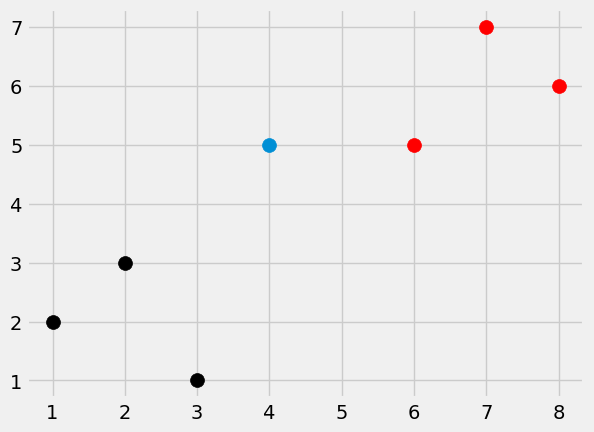

Votes for each group: Counter({'r': 2, 'k': 1})
Predicted group: r


In [31]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter
style.use('fivethirtyeight')

# Sample dataset with two groups 'k' and 'r', each containing some feature vectors
dataset = {'k': [[1,2], [2,3], [3,1]], 'r': [[6,5], [7,7], [8,6]] }

# New feature vector that needs to be classified
new_features = [4,5]

# list comprehension: expression for item in iterable (opitionally: condition)
[ plt.scatter(ii[0], ii[1], s=100, color=i) for i in dataset for ii in dataset[i] ]

plt.scatter(new_features[0], new_features[1], s=100)
plt.show()

def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups')
    
    distances = []
    for group in data:
        for features in data[group]:
            # calculate the euclidean distance between the feature points and the predicted point
            #euclidean_distance = np.sqrt( np.sum( np.array(features) - np.array(predict) ) **2 ) # correct but slower
            euclidean_distance = np.linalg.norm( np.array(features) - np.array(predict) ) # faster
            
            # Store the Euclidean distance along with the group name in a list
            distances.append([euclidean_distance, group])
    
    # Sort the distances and choose the group with the k smallest distances
    votes = [ i[1] for i in sorted(distances)[:k] ]
    
    # Count the occurrences of each group and choose the most common one
    #vote_result = Counter(votes).most_common(1)[0][0]
    most_common_group, num_votes = Counter(votes).most_common(1)[0]
    
    print("Votes for each group:", Counter(votes))
    #print("Most common group:", most_common_group)
    
    return most_common_group

result = k_nearest_neighbors(dataset, new_features, k=3)
print("Predicted group:", result)

## List comprehension
new_list = [expression for item in iterable if condition]

In [1]:
squares = [x ** 2 for x in range(1, 6)]
print(squares)

[1, 4, 9, 16, 25]


In [2]:
odd_numbers = [x for x in range(1, 11) if x % 2 != 0]
print(odd_numbers)

[1, 3, 5, 7, 9]


In [3]:
list1 = [1, 2, 3]
list2 = [10, 20, 30]
pairs = [(x, y) for x in list1 for y in list2]
print(pairs)

[(1, 10), (1, 20), (1, 30), (2, 10), (2, 20), (2, 30), (3, 10), (3, 20), (3, 30)]


In [4]:
list1 = [1, 2, 3]
list2 = [10, 20, 30]
pairs = [(x, y) for x,y in zip(list1, list2)]
print(pairs)

[(1, 10), (2, 20), (3, 30)]
